# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Deaka Ahmad Naufal
- Email: deaka225@gmail.com
- Id Dicoding: dahmadn

## Persiapan

### Menyiapkan library yang dibutuhkan

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan digunakan

In [30]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv"
df = pd.read_csv(url, sep=";")

## Data Understanding

In [31]:
df.shape

(4424, 37)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
|Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
|Course | The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
|Previous qualification| The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |
|Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| Nacionality | The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification | The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification | The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation | The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |
| Father's occupation | The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |
| Admission grade | Admission grade (between 0 and 200) |
| Displaced | Whether the student is a displaced person. (Categorical) 	1 – yes 0 – no |
| Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
|Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no|
|Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no|
|Gender | The gender of the student. (Categorical) 1 – male 0 – female |
|Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
|Age at enrollment | The age of the student at the time of enrollment. (Numerical)|
|International | Whether the student is an international student. (Categorical) 1 – yes 0 – no|
|Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) |



Acknowledgements
Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict students' dropout and academic success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

In [33]:
print("Jumlah duplikat pada data :", df.duplicated().sum())

Jumlah duplikat pada data : 0


In [34]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Data cukup clean tidak terdapat duplikat ataupun missing value

In [35]:
# Petakan label terhadap data sesungguhnya
# ==============================
# DAFTAR PEMETAAN KATEGORIKAL
# ==============================

# Status Pernikahan
marital_status_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}

# Mode Aplikasi
application_mode_mapping = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

# Program Studi
course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

# Waktu Kuliah
daytime_evening_mapping = {
    1: 'Daytime',
    0: 'Evening'
}

# Kualifikasi Pendidikan Sebelumnya
previous_qualification_mapping = {
    1: 'Secondary education',
    2: 'Higher education - bachelor\'s degree',
    3: 'Higher education - degree',
    4: 'Higher education - master\'s',
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}

# Kewarganegaraan
nationality_mapping = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}

# Kualifikasi Ibu
mother_qualification_mapping = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: 'Higher Education - Bachelor\'s Degree',
    3: 'Higher Education - Degree',
    4: 'Higher Education - Master\'s',
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    22: 'Technical-professional course',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    34: 'Unknown',
    35: 'Can\'t read or write',
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}

# Kualifikasi Ayah
father_qualification_mapping = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: 'Higher Education - Bachelor\'s Degree',
    3: 'Higher Education - Degree',
    4: 'Higher Education - Master\'s',
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    13: '2nd year complementary high school course',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    20: 'Complementary High School Course',
    22: 'Technical-professional course',
    25: 'Complementary High School Course - not concluded',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    31: 'General Course of Administration and Commerce',
    33: 'Supplementary Accounting and Administration',
    34: 'Unknown',
    35: 'Can\'t read or write',
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}

# Pekerjaan Ibu (Disederhanakan)
mother_occupation_mapping = {
    0: 'Student',
    1: 'Legislative/Executive Roles',
    2: 'Scientific Specialists',
    3: 'Technicians',
    4: 'Administrative Staff',
    5: 'Service/Security Workers',
    6: 'Skilled Agricultural Workers',
    7: 'Skilled Industrial Workers',
    8: 'Machine Operators',
    9: 'Unskilled Workers',
    10: 'Military',
    90: 'Other',
    99: 'Blank',
    122: 'Health Professionals',
    123: 'Teachers',
    125: 'ICT Specialists',
    131: 'Science/Engineering Technicians',
    132: 'Health Technicians',
    134: 'Legal/Social Services Technicians',
    141: 'Office Staff',
    143: 'Data Operators',
    144: 'Administrative Support',
    151: 'Service Workers',
    152: 'Sellers',
    153: 'Care Workers',
    171: 'Construction Workers',
    173: 'Craftsmen',
    175: 'Manufacturing Workers',
    191: 'Cleaners',
    192: 'Unskilled Agricultural',
    193: 'Unskilled Industrial',
    194: 'Food Prep Assistants'
}

# Pekerjaan Ayah (Disederhanakan)
father_occupation_mapping = {
    0: 'Student',
    1: 'Legislative/Executive Roles',
    2: 'Scientific Specialists',
    3: 'Technicians',
    4: 'Administrative Staff',
    5: 'Service/Security Workers',
    6: 'Skilled Agricultural Workers',
    7: 'Skilled Industrial Workers',
    8: 'Machine Operators',
    9: 'Unskilled Workers',
    10: 'Military',
    90: 'Other',
    99: 'Blank',
    101: 'Military Officers',
    102: 'Military Sergeants',
    103: 'Other Military',
    112: 'Admin Directors',
    114: 'Service Directors',
    121: 'STEM Specialists',
    122: 'Health Professionals',
    123: 'Teachers',
    124: 'Finance/Admin Specialists',
    131: 'Science/Engineering Technicians',
    132: 'Health Technicians',
    134: 'Legal/Social Services Technicians',
    135: 'ICT Technicians',
    141: 'Office Staff',
    143: 'Data Operators',
    144: 'Administrative Support',
    151: 'Service Workers',
    152: 'Sellers',
    153: 'Care Workers',
    154: 'Security Personnel',
    161: 'Commercial Farmers',
    163: 'Subsistence Farmers',
    171: 'Construction Workers',
    172: 'Metal Workers',
    174: 'Electrical Workers',
    175: 'Manufacturing Workers',
    181: 'Plant Operators',
    182: 'Assembly Workers',
    183: 'Drivers',
    192: 'Unskilled Agricultural',
    193: 'Unskilled Industrial',
    194: 'Food Prep Assistants',
    195: 'Street Vendors'
}

# Pemetaan untuk fitur biner
binary_mapping = {
    1: 'Yes',
    0: 'No'
}

# Pemetaan Gender
gender_mapping = {
    1: 'Male',
    0: 'Female'
}
df_new = df.copy()

df_new['Marital_status'] = df['Marital_status'].map(marital_status_mapping)
df_new['Application_mode'] = df['Application_mode'].map(application_mode_mapping)
df_new['Course'] = df['Course'].map(course_mapping)
df_new['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].map(daytime_evening_mapping)
df_new['Previous_qualification'] = df['Previous_qualification'].map(previous_qualification_mapping)
df_new['Nacionality'] = df['Nacionality'].map(nationality_mapping)
df_new["Mothers_qualification"] = df["Mothers_qualification"].map(mother_qualification_mapping)
df_new["Fathers_qualification"] = df["Fathers_qualification"].map(father_qualification_mapping)
df_new["Mothers_occupation"] = df["Mothers_occupation"].map(mother_occupation_mapping)
df_new["Fathers_occupation"] = df["Fathers_occupation"].map(father_occupation_mapping)

# Fitur Biner
binary_cols = [
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'International'
]
for col in binary_cols:
    df_new[col] = df[col].map(binary_mapping)

# Gender
df_new['Gender'] = df['Gender'].map(gender_mapping)



mapping dilakukan agar mudah memahami data

In [36]:
df_new.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [37]:
df_new.describe()

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [56]:
df_new.to_csv('student_mapped.csv', index=False)

save data yang sudah clean ke dalam file csv

### EDA

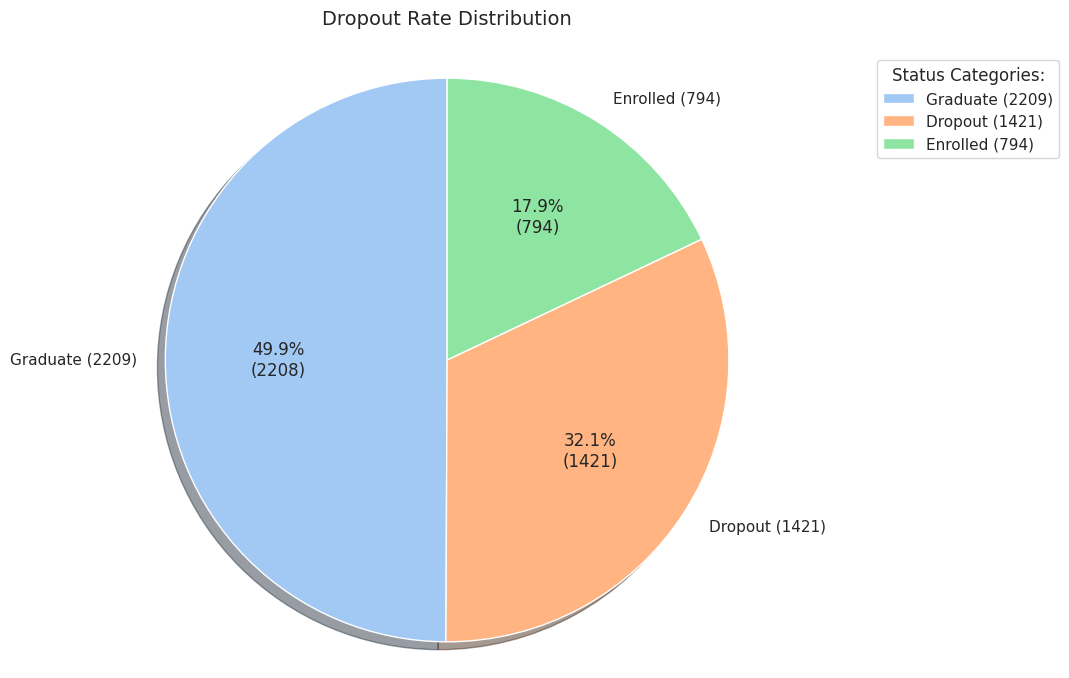

In [38]:
#Pie chart of dropout rate distribution
plt.figure(figsize=(8, 8))


status_counts = df_new['Status'].value_counts()
labels = [f'{label} ({count})' for label, count in zip(status_counts.index, status_counts.values)]


plt.pie(status_counts,
        labels=labels,
        autopct=lambda p: f'{p:.1f}%\n({int(p/100*status_counts.sum())})',
        startangle=90,
        shadow=True)

plt.title('Dropout Rate Distribution', fontsize=14, pad=20)
plt.axis('equal')

plt.legend(title="Status Categories:",
           loc="upper right",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Sebanyak 32,1% siswa dropout

### Cek korelasi

In [39]:
encoded_df = df.copy()
status_map = {"Dropout" : 0 ,"Enrolled": 1, "Graduate": 1}
encoded_df["Status"] = encoded_df["Status"].map(status_map)
#encode fitur
le  = LabelEncoder()
categorical_columns = encoded_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    encoded_df[column] = le.fit_transform(encoded_df[column])


Fitur kategorikal diencode agar dapat melihat korelasinya dengan fitur target

In [40]:
# Hitung korelasi ke fitur target
target_corr = encoded_df.corr()[['Status']].sort_values(by='Status', ascending=False)
target_corr = target_corr.drop('Status')
target_corr

,Status
Curricular_units_2nd_sem_grade,0.571792
Curricular_units_2nd_sem_approved,0.569500
Curricular_units_1st_sem_grade,0.480669
Curricular_units_1st_sem_approved,0.479112
Tuition_fees_up_to_date,0.429149
Scholarship_holder,0.245354
Curricular_units_2nd_sem_evaluations,0.154999
Curricular_units_2nd_sem_enrolled,0.141515
Curricular_units_1st_sem_enrolled,0.124635
Displaced,0.107232


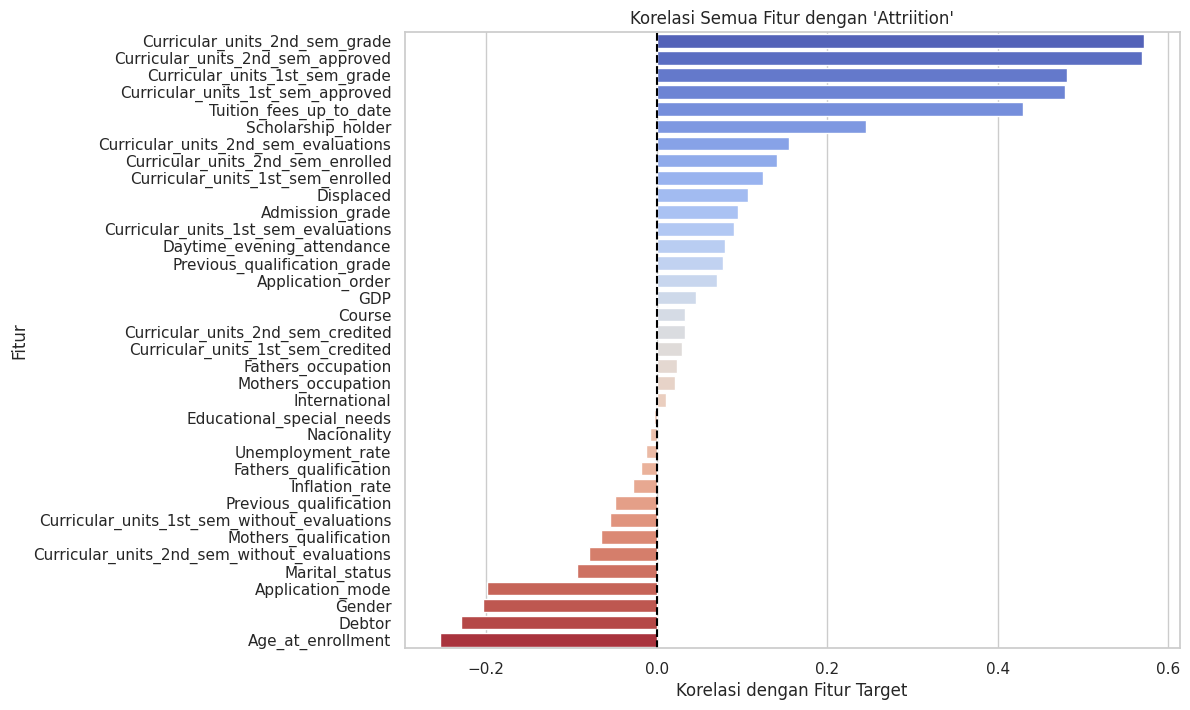

In [41]:



# Plot bar horizontal
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr['Status'], y=target_corr.index, palette='coolwarm')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("Korelasi dengan Fitur Target")
plt.ylabel("Fitur")
plt.title("Korelasi Semua Fitur dengan 'Attriition'")
plt.show()

Fitur teratas yang berkorelasi positif dengan Status:

1. Curricular_units_2nd_sem_approved	0.624157


2. Curricular_units_2nd_sem_grade	0.566827


3. Curricular_units_1st_sem_approved	0.529123


4. Curricular_units_1st_sem_grade	0.485207


5. Tuition_fees_up_to_date	0.409827


Faktor teratas yang berkorelasi negatif dengan Status:

1. Age_at_enrollment	-0.243438


2. Debtor	-0.240999


3. Gender	-0.229270


4. Application_mode	-0.221747

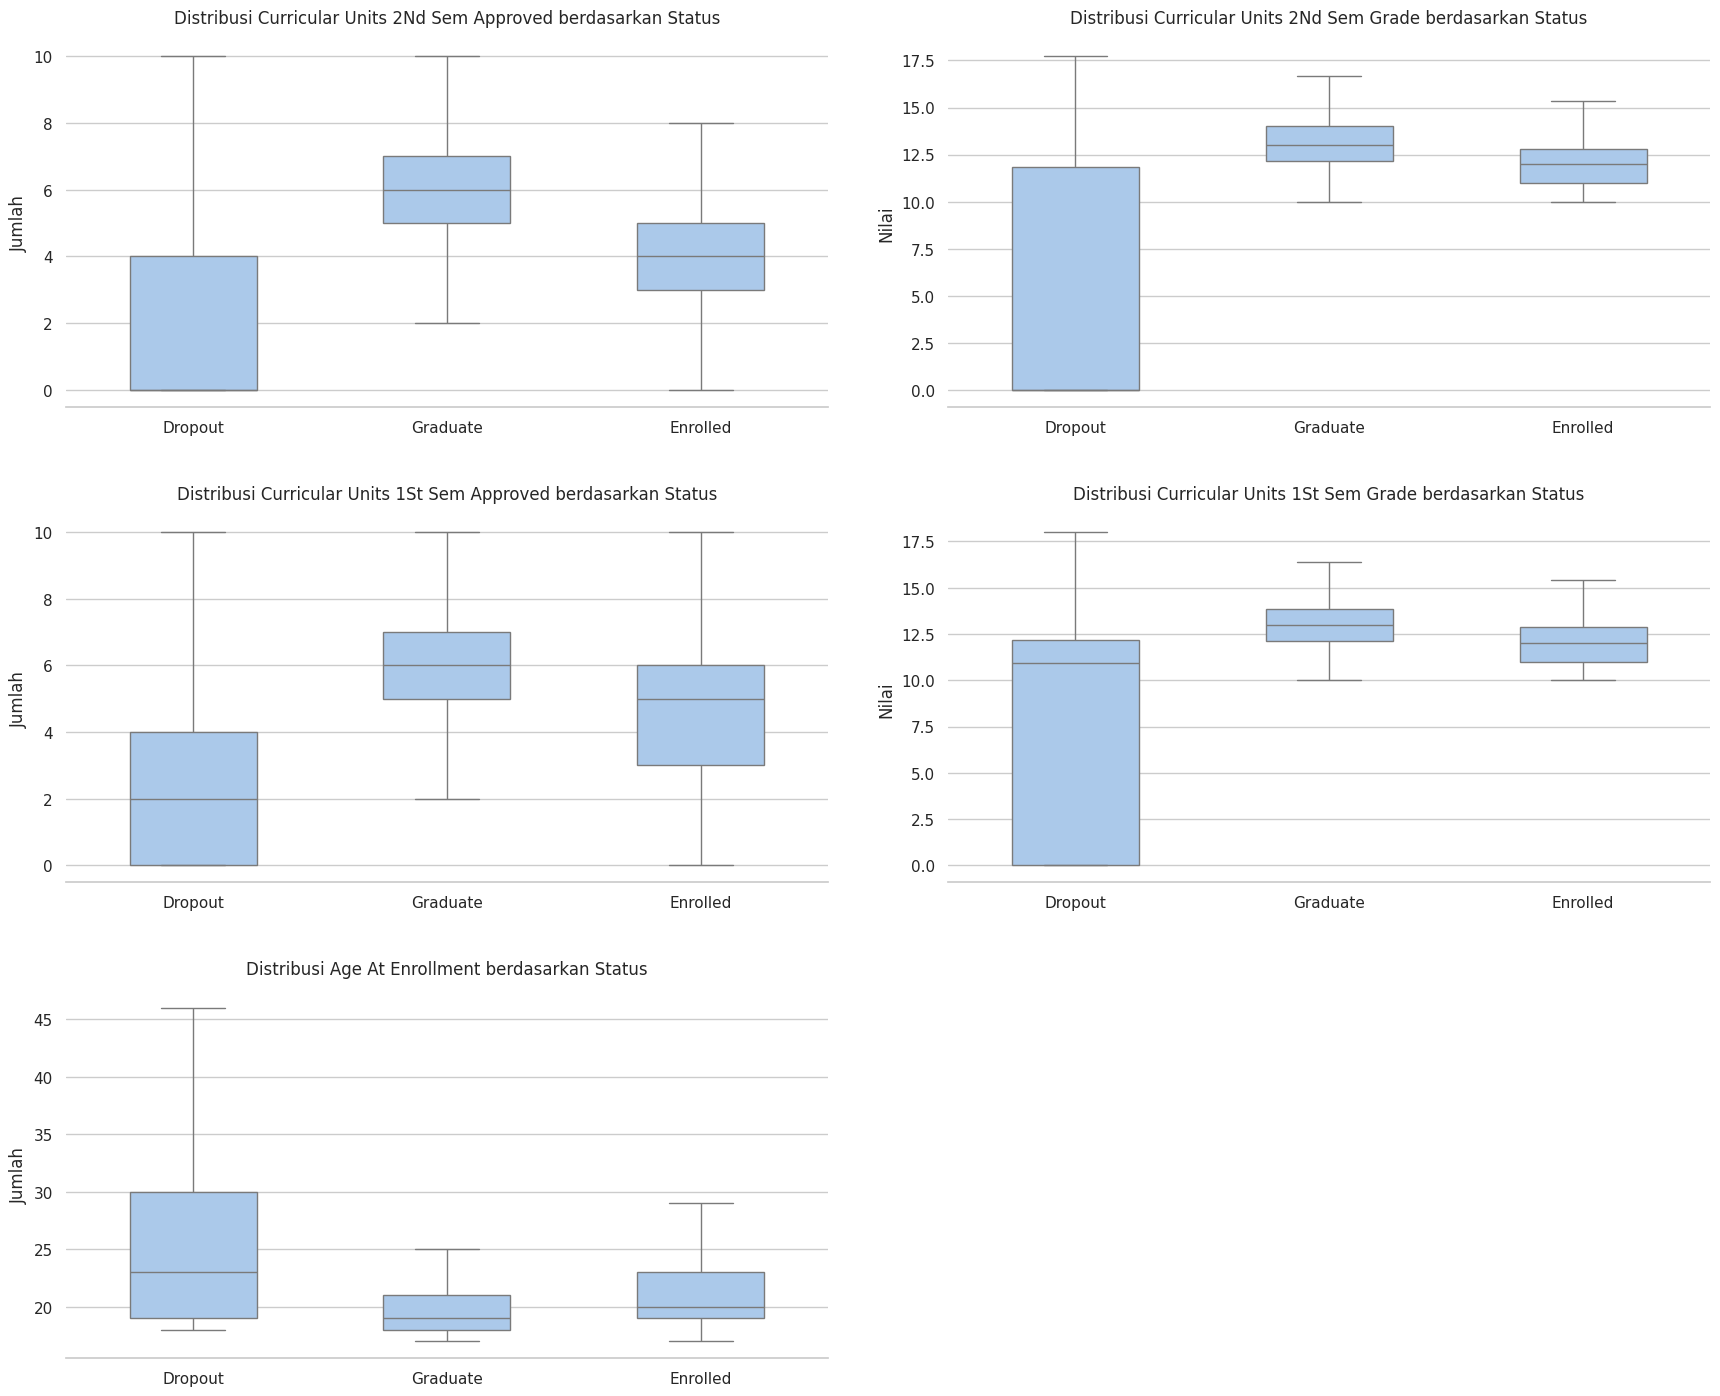

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fitur terpilih
feature_selected = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Age_at_enrollment',
]

# Atur style
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(18, 24))

# Loop melalui setiap fitur
for idx, feature in enumerate(feature_selected, 1):
    plt.subplot(5, 2, idx)

    # Hanya untuk fitur numerik (kecuali Application_mode)
    if df_new[feature].dtype in ['int64', 'float64'] and feature != 'Application_mode':
        sns.boxplot(
            x='Status',
            y=feature,
            data=df_new,
            showfliers=False,
            width=0.5
        )
        plt.title(f'Distribusi {feature.replace("_", " ").title()} berdasarkan Status', pad=12)
        plt.xlabel('')
        plt.ylabel('Nilai' if 'grade' in feature else 'Jumlah')

    # Format umum
    plt.xticks(rotation=45 if df_new[feature].dtype == 'object' else 0)
    sns.despine(left=True)

plt.tight_layout(pad=3.0)
plt.show()

DApat dilihat bahawa siswa yang dropout selalu memiliki rata rata terendah pada variablel diatas

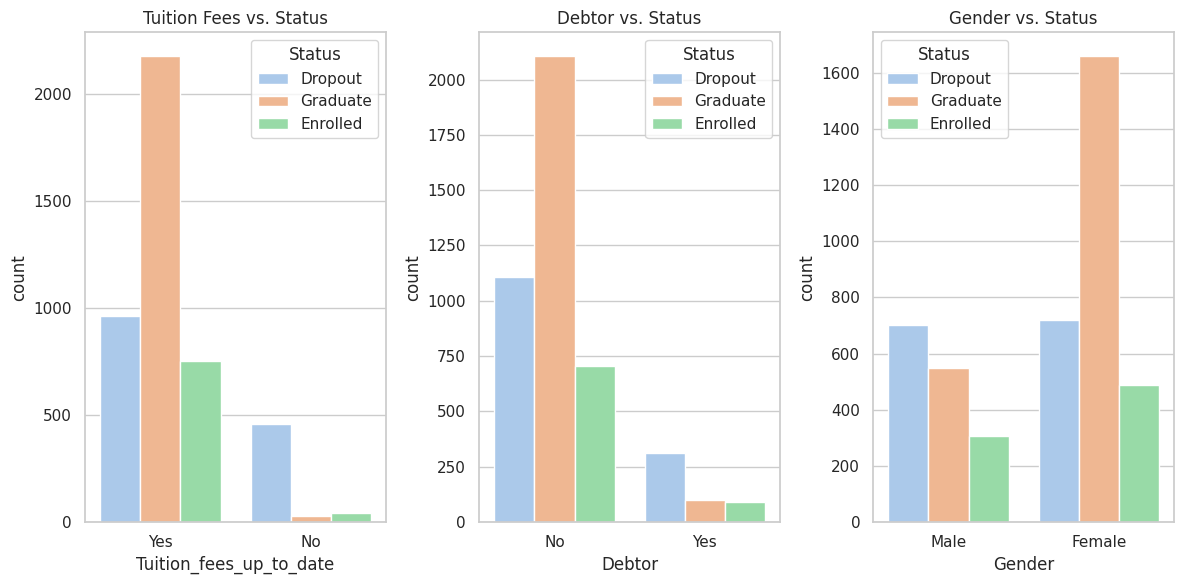

In [43]:
plt.figure(figsize=(12, 6))

# Tuition fees up to date vs. Status
plt.subplot(1, 3, 1)
sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=df_new)
plt.title('Tuition Fees vs. Status')

# Debtor vs. Status
plt.subplot(1, 3, 2)
sns.countplot(x='Debtor', hue='Status', data=df_new)
plt.title('Debtor vs. Status')

# Gender vs. Status
plt.subplot(1, 3, 3)
sns.countplot(x='Gender', hue='Status', data=df_new)
plt.title('Gender vs. Status')


plt.tight_layout()
plt.show()


Dipreoleh bahwa persentase siswa dengan dropout terbanyak berasal dari tuition up to dates no, debtor No, gender Male

## Data Preparation / Preprocessing

### Feature selection

In [44]:

feature_selected = ['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved','Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Age_at_enrollment', 'Debtor', 'Gender', 'Application_mode','Status']
df_selected = encoded_df[feature_selected]
df_selected.head()


,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Age_at_enrollment,Debtor,Gender,Application_mode,Status
0,0,0.000000,0,0.000000,1,20,0,1,17,0
1,6,13.666667,6,14.000000,0,19,0,1,15,1
2,0,0.000000,0,0.000000,0,19,0,1,1,0
3,5,12.400000,6,13.428571,1,20,0,0,17,1
4,6,13.000000,5,12.333333,1,45,0,0,39,1


Fitur dengan nilai korelasi paling mendekati 1 dan -1 dipilih untuk modelling

### Standarisasi Nilai numerik

In [45]:
# Initialize MinMaxScaler
scaler = StandardScaler()
numerical_features = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Age_at_enrollment'
]
# Fit and transform the selected columns
df_selected[numerical_features] = scaler.fit_transform(df_selected[numerical_features])
# Display the updated DataFrame
df_selected.head()


,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Age_at_enrollment,Debtor,Gender,Application_mode,Status
0,-1.471527,-1.963489,-1.521257,-2.197102,1,-0.430363,0,1,17,0
1,0.518904,0.659562,0.418050,0.693599,0,-0.562168,0,1,15,1
2,-1.471527,-1.963489,-1.521257,-2.197102,0,-0.562168,0,1,1,0
3,0.187165,0.416450,0.418050,0.575611,1,-0.430363,0,0,17,1
4,0.518904,0.531608,0.094832,0.349468,1,2.864765,0,0,39,1


standarisasi dilakukan agar data berada pada rentang nilai yang sama

### Splitting dataset

In [46]:
X= df_selected.drop(columns=['Status'])
y= df_selected['Status']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [48]:
# 1. Logistic Regression
Logres = LogisticRegression(
    penalty='l2',
    C=0.5,
    solver='liblinear',
    max_iter=2000,
    random_state=42
).fit(X_train, y_train)

# 2. Decision Tree
dt = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
).fit(X_train, y_train)

# 3. Random Forest
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
).fit(X_train, y_train)

# 4. SVM

SVM = SVC(
    kernel='rbf',
    C=1, gamma=0.1,
    random_state=42
    ).fit(X_train, y_train)

#Xgboost
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
).fit(X_train, y_train)

Digunakan model logistic regression, decision tree, random fores, Suport Vector Machine dan XGBoostuntuk menemukan model yang memiliki nilai akurasi terbaik

## Evaluation

In [49]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro'),

    }
    return results

result = {
    'Logistic Regression': evaluate_model(Logres, X_test, y_test),
    'Decision Tree': evaluate_model(dt, X_test, y_test),
    'Random Forest': evaluate_model(rf, X_test, y_test),
    'SVM': evaluate_model(SVM, X_test, y_test),
    'XGBoost': evaluate_model(xgb, X_test, y_test)


}

summary = pd.DataFrame(columns=[ 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in result.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']

    })

# Konversi daftar kamus ke DataFrame
summary = pd.DataFrame(rows)

# Tampilkan DataFrame
summary.head()

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.833898,0.834730,0.796250,0.809273
1,Decision Tree,0.777401,0.758475,0.750203,0.753802
2,Random Forest,0.828249,0.821948,0.796078,0.805782
3,SVM,0.832768,0.836328,0.792557,0.806700
4,XGBoost,0.842938,0.841081,0.810316,0.821611


In [50]:
best_model = xgb

Diperoleh model Xtreme Gradient boosting sebagai model terbaik pada kasus ini dapat dilihat dari accuracy precission recall dan f1score

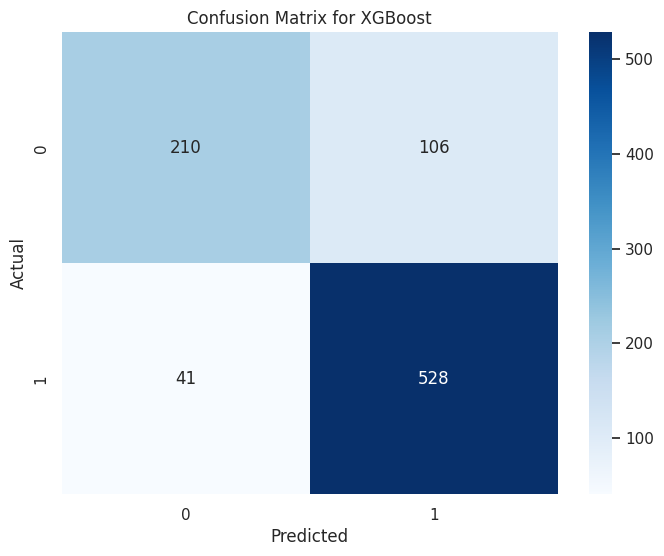

In [51]:


y_pred = Logres.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()


In [52]:
best_model = xgb
# Save model dan scaler
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Deployment

In [53]:

# Load model
loaded_model = joblib.load('best_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

df_dummy = pd.DataFrame({
    'Curricular_units_2nd_sem_approved' : [14],
    'Curricular_units_2nd_sem_grade'  : [16],
    'Curricular_units_1st_sem_approved': [14],
    'Curricular_units_1st_sem_grade': [16],
    'Tuition_fees_up_to_date' :[1],
    'Age_at_enrollment': [27],
    'Debtor'  : [1],
    'Gender': [1],
    'Application_mode' : [3]
})

numerical_features = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Age_at_enrollment'
]
# Scaling dummy input
df_dummy_scaled = df_dummy.copy()
df_dummy_scaled[numerical_features] = loaded_scaler.transform(df_dummy[numerical_features])
df_dummy_scaled = df_dummy_scaled[ ['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved','Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Age_at_enrollment', 'Debtor', 'Gender', 'Application_mode']]

# Mapping hasil prediksi

mapping = {0: "Siswa Dropout", 1: "Siswa Graduate"}

# Prediksi menggunakan model
prediction = loaded_model.predict(df_dummy_scaled)
probabilities = loaded_model.predict_proba(df_dummy_scaled)

# Probabilitas untuk Tetap diperusahaan (dropout: 0) dan Pergi dari perusahaan (Graduate: 1)
proba_ = probabilities[:, 0] * 100
proba_do = probabilities[:, 1] * 100

# Tampilkan hasil
print(f"Prediksi : {mapping[prediction[0]]}")
print(f"Probabilitas siswa akan dropout: {proba_do[0]:.2f}%")

Prediksi : Siswa Graduate
Probabilitas siswa akan dropout: 27.00%


In [54]:
!pip freeze  > requirements.txt